# First Delivery Enterprise Data Science

In [1]:
# Import required Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import os
from os.path import dirname as pDir
from os.path import join as pJoin



pd.set_option('display.max_rows',500)

parentDirectoryMain = pDir(pDir(os.path.abspath('__file__')))

In [2]:
country_list = ['US','Italy','India']

#### Steps need to be followed:
1. Get the covid cases data from John Hopkins dataset (https://github.com/CSSEGISandData/COVID-19.git)
2. Get vaccination data from Johns Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
    (https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data)

3. Get population data(2018) from  Johns Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
(https://github.com/govex/COVID-19/blob/master/data_tables/world_pop_by_country.csv)

## Task 1:
- The relative cases overtime of Covid infectors (absolute Covid cases/population size) for 3 countries

In [3]:
csvFilePath  = pJoin(parentDirectoryMain,"data","raw","COVID-19","csse_covid_19_data","csse_covid_19_time_series","time_series_covid19_confirmed_global.csv")
# csvFilePath = r'..\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'

df_covid_cases_raw =  pd.read_csv(csvFilePath)

In [4]:
df_covid_cases_raw.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
df_covid_cases = df_covid_cases_raw.rename(columns = {'Country/Region' : 'country','Province/State':'state'})
df_covid_cases['state'] = df_covid_cases['state'].fillna('no')
df_covid_cases = df_covid_cases.drop(['Lat','Long'], axis=1)

In [6]:
df_covid_cases.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,no,Albania,0,0,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,no,Algeria,0,0,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [7]:
time_idx = df_covid_cases.columns[2: ]

df_plot = pd.DataFrame({'date':time_idx})

df_plot.head(5)

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
for each in country_list:
    df_plot[each] = np.array(df_covid_cases[df_covid_cases['country']==each].iloc[:,2::].sum(axis=0))

In [9]:
df_plot

,date,US,Italy,India
0,1/22/20,1,0,0
1,1/23/20,1,0,0
2,1/24/20,2,0,0
3,1/25/20,2,0,0
4,1/26/20,5,0,0
...,...,...,...,...
880,6/20/22,86297081,17896065,43319396
881,6/21/22,86452232,17959329,43331645
882,6/22/22,86636306,18014202,43344958
883,6/23/22,86757621,18071634,43362294


In [10]:
#Population Data
populationCsv = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv')

In [11]:
populationCsv = populationCsv.drop(['Country Code',], axis=1) \
                .rename(columns = {'2018' : 'Population'})    \
                .set_index(['Country Name']).T

In [12]:
for each in country_list:
    df_plot[each] = np.array(df_plot[each]/float(populationCsv[each]))

In [13]:
df_plot

,date,US,Italy,India
0,1/22/20,3.056539e-09,0.000000,0.000000
1,1/23/20,3.056539e-09,0.000000,0.000000
2,1/24/20,6.113078e-09,0.000000,0.000000
3,1/25/20,6.113078e-09,0.000000,0.000000
4,1/26/20,1.528269e-08,0.000000,0.000000
...,...,...,...,...
880,6/20/22,2.637704e-01,0.296139,0.032026
881,6/21/22,2.642446e-01,0.297186,0.032035
882,6/22/22,2.648072e-01,0.298094,0.032045
883,6/23/22,2.651780e-01,0.299044,0.032058


<AxesSubplot:title={'center':'Number of Cases/Population vs Date'}, xlabel='Date', ylabel='Number of Cases'>

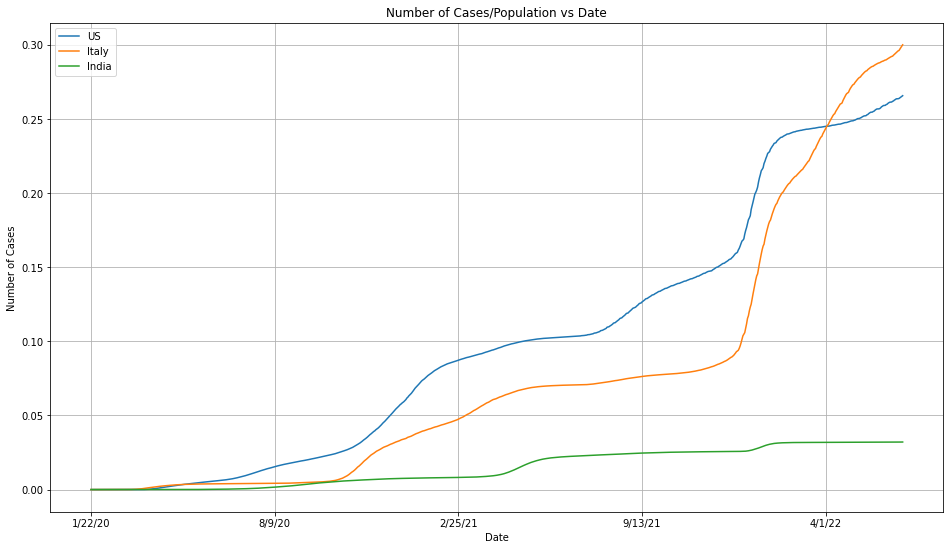

In [14]:
%matplotlib inline
df_plot.set_index('date').plot(title="Number of Cases/Population vs Date",ylabel= "Number of Cases",xlabel = "Date",grid="on",figsize=(16,9))

## Task 2:
- The vaccination rate (percentage of the population) over time for 3 countries

In [15]:
vaccinationPath = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
pd_vaccination_Data = pd.read_csv(vaccinationPath, usecols = ['Date','Country_Region','People_fully_vaccinated'],parse_dates=['Date'])
# pd_vaccination_Data['People_fully_vaccinated'] = pd_vaccination_Data['People_fully_vaccinated'].fillna(0)


In [16]:
pd_vaccination_Data = pd_vaccination_Data[pd_vaccination_Data['Country_Region'].isin(country_list)]

In [17]:
pd_vaccination_Data

,Country_Region,Date,People_fully_vaccinated
27,US,2020-12-20,0.0
33,US,2020-12-21,0.0
40,US,2020-12-22,0.0
49,US,2020-12-23,0.0
61,US,2020-12-24,0.0
...,...,...,...
261593,Italy,2022-06-27,NaN
261594,Italy,2022-06-27,NaN
261595,Italy,2022-06-27,NaN
261596,Italy,2022-06-27,NaN


In [18]:
pivot = pd.pivot_table(
    data=pd_vaccination_Data,                                    # What dataframe to use
    index='Date',                               # The "rows" of your dataframe
    columns='Country_Region',                         # What values to show as columns
    values='People_fully_vaccinated',    # What values to aggregate
                             # How to aggregate data
    )

pivot = pivot.fillna(0)

In [19]:
for each in country_list:
    pivot[each] = np.array(pivot[each]/float(populationCsv[each])*100)

In [20]:
pivot

Country_Region,India,Italy,US
Date,,,
2020-12-20,0.000000,0.000000,0.000000
2020-12-21,0.000000,0.000000,0.000000
2020-12-22,0.000000,0.000000,0.000000
2020-12-23,0.000000,0.000000,0.000000
2020-12-24,0.000000,0.000000,0.000000
...,...,...,...
2022-06-23,67.187238,79.339692,67.892828
2022-06-24,67.256633,79.340420,67.892828
2022-06-25,67.330493,79.341167,67.892828


<AxesSubplot:title={'center':'Vaccination Rate'}, xlabel='Date', ylabel='Number of Vaccination'>

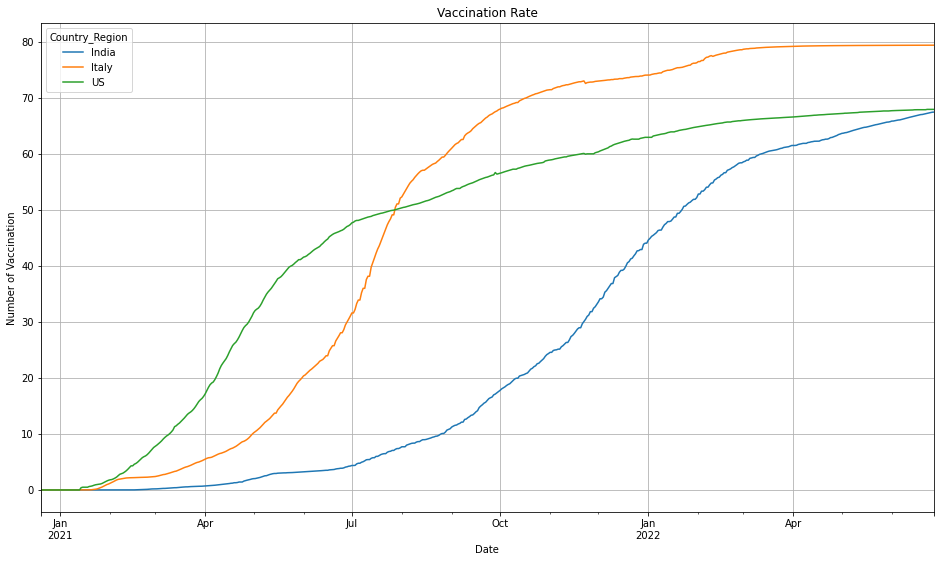

In [21]:
# pivot
pivot.plot(title="Vaccination Rate",ylabel= "Number of Vaccination",xlabel = "Date",grid="on",figsize=(16,9))